In [687]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## Q1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [632]:
d1=pd.read_csv('/Users/himanshusaini/Desktop/projects & assignments/Python Foundation Case Study 1 - Retail Case Study/Customer.csv')
d2=pd.read_csv('/Users/himanshusaini/Desktop/projects & assignments/Python Foundation Case Study 1 - Retail Case Study/prod_cat_info.csv')
d3=pd.read_csv('/Users/himanshusaini/Desktop/projects & assignments/Python Foundation Case Study 1 - Retail Case Study/Transactions.csv')                                                                             

In [118]:
d1.shape


(5647, 4)

In [119]:
d2.shape

(23, 4)

In [120]:
d3.shape

(23053, 10)

In [132]:
d1.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [161]:
d2.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [134]:
d3.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [633]:
test = d3.merge(d2, left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'], how ='left')
test.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY


In [634]:
test.rename(columns={'cust_id':'customer_Id'},inplace=True)

In [635]:
Customer_Final=test.merge(d1,on='customer_Id',how='left')

In [636]:
Customer_Final

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,22-05-1970,M,2.0


## Customer_Final.isna().sum()

In [168]:
Customer_Final.dropna()
Customer_Final

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,22-05-1970,M,2.0


 ## Q2. Prepare a summary report for the merged data set.
 #### a. Get the column names and their corresponding data types 
 #### b. Top/Bottom 10 observations
 #### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
 #### d. Frequency tables for all the categorical variables

In [287]:
Customer_Final.columns

Index(['transaction_id', 'customer_Id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_sub_cat_code', 'prod_subcat', 'DOB', 'Gender',
       'city_code'],
      dtype='object')

In [288]:
Customer_Final.dtypes

transaction_id         int64
customer_Id            int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
DOB                   object
Gender                object
city_code            float64
dtype: object

In [171]:
Customer_Final.head(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
5,97439039119,272357,23-02-2014,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,8,Personal Appliances,09-10-1982,F,6.0
6,45649838090,273667,22-02-2014,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,11,Bath,29-05-1981,M,9.0
7,22643667930,271489,22-02-2014,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,12,Tools,21-04-1971,M,9.0
8,79792372943,275108,22-02-2014,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,3,Kids,04-11-1971,F,8.0
9,50076728598,269014,21-02-2014,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,8,Personal Appliances,27-11-1979,F,3.0


In [172]:
Customer_Final.tail(10)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
23043,49882891062,271982,25-01-2011,10,5,4,1330,558.600,5878.600,e-Shop,Books,10,Non-Fiction,10-08-1976,M,8.0
23044,14787475597,273982,25-01-2011,4,3,5,969,508.725,5353.725,e-Shop,Electronics,4,Mobiles,12-10-1991,M,4.0
23045,50691119572,273031,25-01-2011,6,5,1,1148,120.540,1268.540,TeleShop,Books,6,DIY,17-01-1980,F,8.0
23046,40893803228,272049,25-01-2011,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,11,Bath,28-06-1975,F,6.0
23047,30856003613,266866,25-01-2011,4,2,2,444,93.240,981.240,TeleShop,Footwear,4,Kids,18-04-1974,M,4.0
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,21-02-1972,M,7.0
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,27-04-1984,M,9.0
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,20-06-1976,M,8.0
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,22-05-1970,M,2.0
23052,77960931771,271961,25-01-2011,11,5,1,447,46.935,493.935,TeleShop,Books,11,Children,15-01-1982,M,1.0


In [176]:
Customer_Final.describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,23053.0,5.007348e+10,2.898194e+10,3268991.000,2.493864e+10,5.009313e+10,7.533000e+10,9.998755e+10
customer_Id,23053.0,2.710217e+05,2.431692e+03,266783.000,2.689350e+05,2.709800e+05,2.731140e+05,2.752650e+05
prod_subcat_code,23053.0,6.149091e+00,3.726372e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
prod_cat_code,23053.0,3.763632e+00,1.677016e+00,1.000,2.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Qty,23053.0,2.432395e+00,2.268406e+00,-5.000,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
Rate,23053.0,6.363697e+02,6.223635e+02,-1499.000,3.120000e+02,7.100000e+02,1.109000e+03,1.500000e+03
Tax,23053.0,2.486672e+02,1.871778e+02,7.350,9.828000e+01,1.990800e+02,3.657150e+02,7.875000e+02
total_amt,23053.0,2.107308e+03,2.507561e+03,-8270.925,7.624500e+02,1.754740e+03,3.569150e+03,8.287500e+03
prod_sub_cat_code,23053.0,6.149091e+00,3.726372e+00,1.000,3.000000e+00,5.000000e+00,1.000000e+01,1.200000e+01
city_code,23045.0,5.482534e+00,2.863499e+00,1.000,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01


In [181]:
Customer_Final.loc[:,Customer_Final.dtypes=='object'].describe()

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
count,23053,23053,23053,23053,23053,23044
unique,1129,4,6,18,3987,2
top,13-07-2011,e-Shop,Books,Women,27-12-1988,M
freq,35,9311,6069,3048,32,11811


## Q3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [304]:
for_conti=Customer_Final.loc[:,(Customer_Final.dtypes=='int64')|(Customer_Final.dtypes=='float64')]
for_conti.columns

Index(['transaction_id', 'customer_Id', 'prod_subcat_code', 'prod_cat_code',
       'Qty', 'Rate', 'Tax', 'total_amt', 'prod_sub_cat_code', 'city_code'],
      dtype='object')

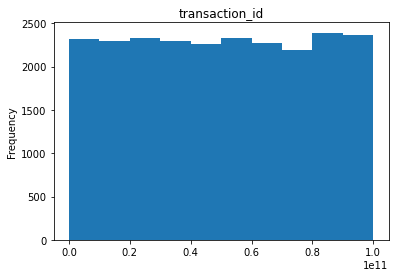

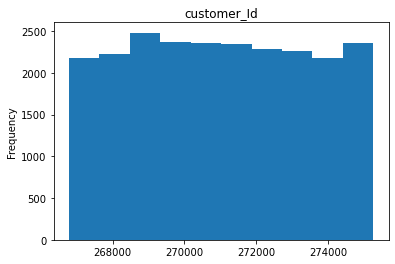

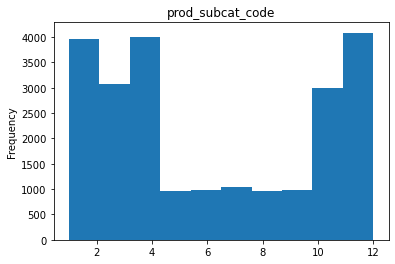

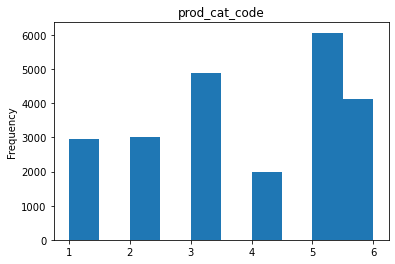

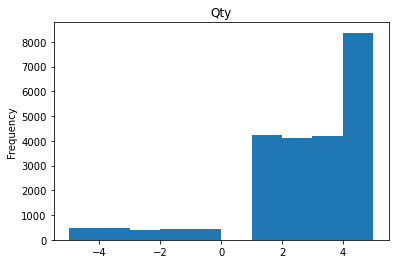

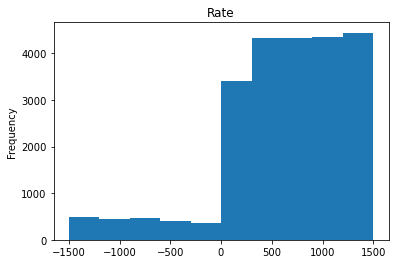

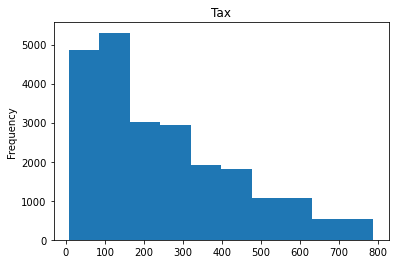

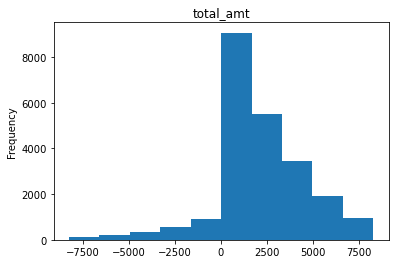

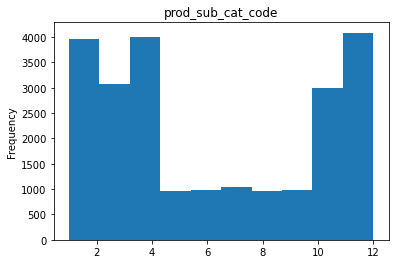

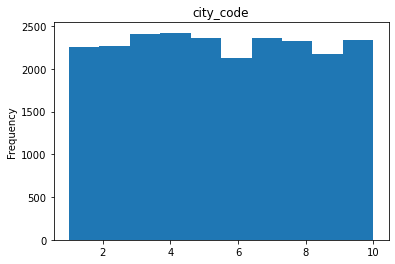

In [311]:
for char in for_conti.columns:
    for_conti[char].plot(kind='hist')
    plt.title(char)
    plt.show()

In [322]:
for_cate=Customer_Final.loc[:,(Customer_Final.dtypes=='object')]

In [323]:
for_cate.columns

Index(['tran_date', 'Store_type', 'prod_cat', 'prod_subcat', 'DOB', 'Gender'], dtype='object')

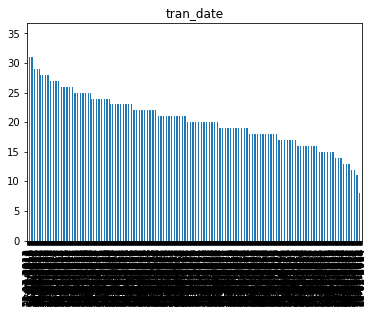

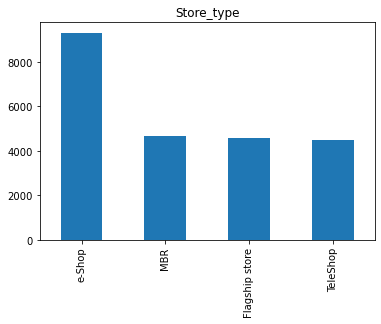

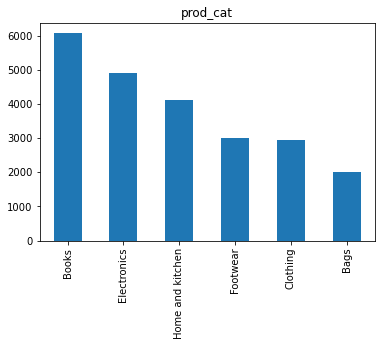

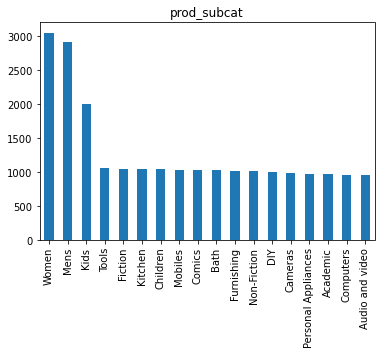

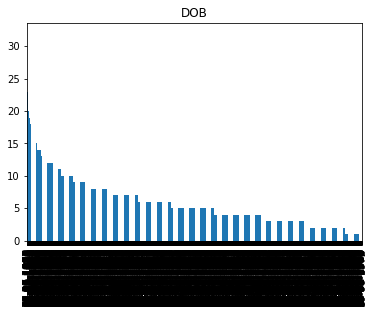

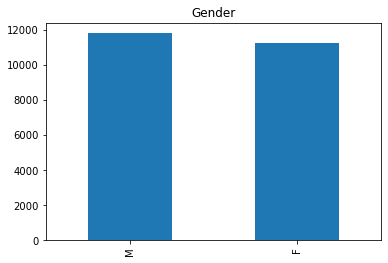

In [344]:
for plot in for_cate.columns:
    for_cate[plot].value_counts().plot(kind='bar')
    plt.title(plot)
    plt.show()
    

## Q4. Calculate the following information using the merged dataset :

#### a. Time period of the available transaction data
#### b. Count of transactions where the total amount of transaction was negative

In [394]:
Customer_Final.tran_date

0        28-02-2014
1        27-02-2014
2        24-02-2014
3        24-02-2014
4        23-02-2014
            ...    
23048    25-01-2011
23049    25-01-2011
23050    25-01-2011
23051    25-01-2011
23052    25-01-2011
Name: tran_date, Length: 23053, dtype: object

In [393]:
Customer_Final.tran_date.sort_values()

16050    1/1/2012
16052    1/1/2012
16053    1/1/2012
16054    1/1/2012
16055    1/1/2012
           ...   
3418     9/9/2013
3417     9/9/2013
3416     9/9/2013
3426     9/9/2013
3431     9/9/2013
Name: tran_date, Length: 23053, dtype: object

In [364]:
first = Customer_Final.tran_date[Customer_Final.tran_date.size-1]
last = Customer_Final.tran_date[0]
last-first

Timedelta('1130 days 00:00:00')

####  b. Count of transactions where the total amount of transaction was negative

In [396]:
Customer_Final.total_amt

0       -4265.300
1       -8270.925
2       -1748.110
3       -4518.345
4       -1748.110
           ...   
23048    1396.720
23049     748.085
23050    4649.840
23051    3785.730
23052     493.935
Name: total_amt, Length: 23053, dtype: float64

In [417]:
total_length=len(Customer_Final[Customer_Final.total_amt < 0])
total_length

2177

In [423]:
print('Total amount of negative transaction is :' ,total_length)

Total amount of negative transaction is : 2177


## Q5. Analyze which product categories are more popular among females vs male customers.

In [425]:
Customer_Final.columns

Index(['transaction_id', 'customer_Id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_sub_cat_code', 'prod_subcat', 'DOB', 'Gender',
       'city_code'],
      dtype='object')

In [434]:
m_f=Customer_Final.groupby(['prod_cat','Gender'])[['Qty']].sum().reset_index()
m_f

,prod_cat,Gender,Qty
0,Bags,F,2362
1,Bags,M,2346
2,Books,F,7070
3,Books,M,7587
4,Clothing,F,3425
5,Clothing,M,3748
6,Electronics,F,5832
7,Electronics,M,6476
8,Footwear,F,3716
9,Footwear,M,3555


In [454]:
m_f.pivot_table(index='Gender',columns='prod_cat',values='Qty')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


## Q6. Which City code has the maximum customers and what was the percentage of customers from that city?


In [678]:
Customer_Final.columns

Index(['transaction_id', 'customer_Id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_sub_cat_code', 'prod_subcat', 'DOB', 'Gender',
       'city_code', 'Age'],
      dtype='object')

In [679]:
Customer_Final.city_code

0        5.0
1        8.0
2        8.0
3        3.0
4        8.0
        ... 
23048    7.0
23049    9.0
23050    8.0
23051    2.0
23052    1.0
Name: city_code, Length: 23053, dtype: float64

In [681]:
mx_cust=Customer_Final.groupby('city_code')['customer_Id'].count().reset_index()
mx_cust

,city_code,customer_Id
0,1.0,2258
1,2.0,2270
2,3.0,2411
3,4.0,2422
4,5.0,2360
5,6.0,2127
6,7.0,2356
7,8.0,2330
8,9.0,2178
9,10.0,2333


In [682]:
mx_cust[mx_cust.customer_Id == mx_cust.customer_Id.max()]

,city_code,customer_Id
3,4.0,2422


## Q7. Which store type sells the maximum products by value and by quantity?

In [475]:
Customer_Final.columns

Index(['transaction_id', 'customer_Id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_sub_cat_code', 'prod_subcat', 'DOB', 'Gender',
       'city_code'],
      dtype='object')

In [492]:
store_mx=Customer_Final.groupby('Store_type')[['Qty','Rate']].sum().reset_index()
store_mx

,Store_type,Qty,Rate
0,Flagship store,11133,2941557
1,MBR,11194,2953253
2,TeleShop,10984,2834420
3,e-Shop,22763,5941001


In [494]:
store_mx.max()

Store_type     e-Shop
Qty             22763
Rate          5941001
dtype: object

## Q8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?


In [495]:
Customer_Final.columns

Index(['transaction_id', 'customer_Id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_sub_cat_code', 'prod_subcat', 'DOB', 'Gender',
       'city_code'],
      dtype='object')

In [514]:
total_value=Customer_Final.groupby(['Store_type','prod_cat'])['total_amt'].sum().reset_index()
flag=total_value[total_value.Store_type=='Flagship store']

In [521]:
final=flag[(flag.prod_cat=='Electronics')|(flag.prod_cat=='Clothing')]
final

,Store_type,prod_cat,total_amt
2,Flagship store,Clothing,1194423.23
3,Flagship store,Electronics,2215136.04


## Q9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [532]:
total_amnt=Customer_Final.groupby(['prod_cat','Gender'])['total_amt'].sum().reset_index()
randm=total_amnt[total_amnt.Gender=='M']
last_total=randm[(randm.prod_cat=='Electronics')]

In [533]:
last_total

,prod_cat,Gender,total_amt
7,Electronics,M,5703109.425


## Q10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [573]:
positive=Customer_Final.loc[Customer_Final['total_amt']> 0,:]

In [556]:
unique_trans=positive.groupby('customer_Id')['transaction_id'].count().reset_index()

In [557]:
unique_trans[unique_trans.transaction_id >10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


## Q11. For all customers aged between 25 - 35, find out:
#### a. What was the total amount spent for “Electronics” and “Books” product categories?
#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [637]:
Customer_Final.DOB=pd.to_datetime(Customer_Final.DOB,format='%d-%m-%Y')                                

In [638]:
Date=Customer_Final.DOB

In [654]:
Customer_Final['Age']=Date.apply(lambda x: pd.to_datetime('today').year-x.year )

In [647]:
total_age=Customer_Final[(Customer_Final.Age>25)&(Customer_Final.Age<35)].reset_index(drop=True)

In [648]:
age_total=total_age.groupby('prod_cat')['total_amt'].sum().reset_index()

In [651]:
age_total

,prod_cat,total_amt
0,Bags,873679.300
1,Books,2667784.925
2,Clothing,1443346.580
3,Electronics,2272147.410
4,Footwear,1433147.430
5,Home and kitchen,1864549.375


In [649]:
finals=age_total[(age_total.prod_cat=='Electronics')|(age_total.prod_cat=='Books')]

In [650]:
finals

,prod_cat,total_amt
1,Books,2667784.925
3,Electronics,2272147.410


#### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [664]:
total_age.tran_date=total_age.tran_date.apply(lambda x: x.replace('/' , '-'))

In [665]:
total_age.tran_date = pd.to_datetime(total_age.tran_date, format='%d-%m-%Y')

In [674]:
date_pred=total_age[(total_age.tran_date > pd.to_datetime('01-01-2014' ,format='%d-%m-%Y'))&(total_age.tran_date < pd.to_datetime('01-03-2014' ,format='%d-%m-%Y'))]

In [675]:
date_pred

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code,Age
0,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,30
1,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,30
2,91116291703,268509,2014-02-20,1,2,4,1243,522.060,5494.060,MBR,Footwear,1,Mens,1989-08-17,M,10.0,33
3,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,4,Women,1992-01-02,F,6.0,30
4,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,3,Women,1992-02-06,F,10.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,32899104170,270064,2014-01-02,2,6,3,802,252.630,2658.630,TeleShop,Home and kitchen,2,Furnishing,1990-02-22,F,3.0,32
224,14302941720,273058,2014-01-02,1,2,1,674,70.770,744.770,e-Shop,Footwear,1,Mens,1989-08-11,F,10.0,33
225,32125935023,272067,2014-01-02,10,3,5,1211,635.775,6690.775,e-Shop,Electronics,10,Audio and video,1989-05-14,M,5.0,33
226,50346649770,270616,2014-01-02,4,2,2,977,205.170,2159.170,MBR,Footwear,4,Kids,1988-08-01,M,9.0,34


In [677]:
date_pred.total_amt.sum()

529311.575